# A. Load HyP3 SBAS Stack into MintPy

*Author: Alex Lewandowski; Alaska Satellite Facility*

**Load your previously downloaded HyP3 SBAS stack into MintPy.**

- Load an SBAS stack from many GeoTiffs into two HDF5 datasets
  - `geometryGeo.h5`
  - `ifgramStack.h5`
 
You only need to perform this step once. You will be able to configure and reconfigure the parameters of your time series analysis without having to reload the data.

This notebook will provide the option to delete your GeoTiffs once they are loaded by MintPy

---

<div class="alert alert-info" style="display: flex; align-items: center; font-family: 'Times New Roman', Times, serif; background-color: #d1ecf1;">
  <div style="display: flex; align-items: center; width: 10%;">
    <a href="https://github.com/ASFOpenSARlab/opensarlab_MintPy_Recipe_Book/issues">
      <img src="github_issues.png" alt="GitHub logo over the word Issues" style="width: 100%;">
    </a>
  </div>
  <div style="width: 95%;">
    <b>Did you find a bug? Do you have a feature request?</b>
    <br/>
    Explore GitHub Issues on this Jupyter Book's GitHub repository. Find solutions, add to the discussion, and start a new bug report or feature request: <a href="https://github.com/ASFOpenSARlab/opensarlab_MintPy_Recipe_Book/issues">opensarlab_MintPy_Recipe_Book Issues</a>
  </div>
</div>

<div class="alert alert-info" style="display: flex; align-items: center; justify-content: space-between; font-family: 'Times New Roman', Times, serif; background-color: #d1ecf1;">
  <div style="display: flex; align-items: center; width: 10%; margin-right: 10px;">
    <a href="mailto:uso@asf.alaska.edu">
      <img src="ASF_support_logo.png" alt="ASF logo" style="width: 100%">
    </a>
  </div>
  <div style="width: 95%;">
    <b>Have a question related to SAR, ASF data access, or performing SBAS time series analyses with MintPy?</b>
    <br/>
    Contact ASF User Support: <a href="mailto:uso@asf.alaska.edu">uso@asf.alaska.edu</a>
  </div>
</div>

---

## 0. Import Required Software

In [1]:
from pathlib import Path
from pprint import pprint
import shutil

import h5py
from ipyfilechooser import FileChooser
from mintpy.cli import plot_network
import opensarlab_lib as osl

---
## 1. Create a Custom Config File Defining the Paths to the GeoTiffs

**Select the directory holding your MintPy-ready HyP3 data stack and/or MintPy directory from a previously loaded MintPy SBAS stack**
- Click the `Select` button
- Navigate to your data directory
- Click the `Select` button
- Confirm that the desired path appears in green text
- Click the `Change` button to alter your selection

In [2]:
path = Path.home()
fc = FileChooser(path)
display(fc)

FileChooser(path='/home/jovyan', filename='', title='', show_hidden=False, select_desc='Select', change_desc='…

**Define a project name and create a MintPy directory in which to store files output during our analysis**

In [3]:
# define the work directory
data_path = Path(fc.selected_path)
print(f"Work directory: {data_path}")

# define the MintPy time-series directory
mint_path = data_path / 'MintPy'
mint_path.mkdir(exist_ok=True)
print(f"MintPy directory: {mint_path}")

# define a project name
proj_name = input("Enter a project name: ")
custom_config_path = mint_path / f'{proj_name}.txt'
print(f"Custom config path: {custom_config_path}")

#create a directory in which to store plots
plot_path = mint_path / "plots"
plot_path.mkdir(exist_ok=True)

Work directory: /home/jovyan/yuma_utm
MintPy directory: /home/jovyan/yuma_utm/MintPy


Enter a project name:  yuma_utm


Custom config path: /home/jovyan/yuma_utm/MintPy/yuma_utm.txt


**Define the paths to the GeoTiffs in a custom config**

In [4]:
con_comp_path = list(data_path.glob('./*/*_conncomp*.tif'))
burst = len(con_comp_path) > 0

config = f"""
mintpy.load.processor        = hyp3
##---------geometry datasets:
mintpy.load.demFile          = {data_path}/*/*_dem*.tif
mintpy.load.incAngleFile     = {data_path}/*/*_lv_theta*.tif
mintpy.load.azAngleFile      = {data_path}/*/*_lv_phi*.tif
mintpy.load.waterMaskFile    = {data_path}/*/*_water_mask*.tif
##---------interferogram datasets:
mintpy.load.unwFile          = {data_path}/*/*_unw_phase*.tif
mintpy.load.corFile          = {data_path}/*/*_corr*.tif
"""

if burst:
    config += f"mintpy.load.connCompFile     = {data_path}/*/*_conncomp*.tif"
    
print(config)
custom_config_path.write_text(config)


mintpy.load.processor        = hyp3
##---------geometry datasets:
mintpy.load.demFile          = /home/jovyan/yuma_utm/*/*_dem*.tif
mintpy.load.incAngleFile     = /home/jovyan/yuma_utm/*/*_lv_theta*.tif
mintpy.load.azAngleFile      = /home/jovyan/yuma_utm/*/*_lv_phi*.tif
mintpy.load.waterMaskFile    = /home/jovyan/yuma_utm/*/*_water_mask*.tif
##---------interferogram datasets:
mintpy.load.unwFile          = /home/jovyan/yuma_utm/*/*_unw_phase*.tif
mintpy.load.corFile          = /home/jovyan/yuma_utm/*/*_corr*.tif



520

---
## 2. Load the Data with MintPy

The output of the loading step is saved to the `MintPy/inputs` directory:
- ifgramStack.h5: 
- geometryGeo.h5

In [5]:
!smallbaselineApp.py $custom_config_path --work-dir {mint_path} --dostep load_data

MintPy version 1.6.0, date 2024-05-09
--RUN-at-2024-06-10 16:58:44.888495--
Current directory: /home/jovyan/opensarlab_MintPy_Recipe_Book
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_ionosphere', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: yuma_utm
Go to work directory: /home/jovyan/yuma_utm/MintPy
copy default template file /home/jovyan/.local/envs/opensarlab_mintpy_recipe_book/lib/python3.9/site-packages/mintpy/defaults/smallbaselineApp.cfg to work directory
read custom template file: /home/jovyan/yuma_utm/MintPy/yuma_utm.txt
update default template based on input custom template
    mintpy.load.processor: auto --> hyp3
    mintpy.load.unwFile: auto

In [6]:
inputs_path = mint_path/'inputs'
!ls $inputs_path

geometryGeo.h5	ifgramStack.h5	smallbaselineApp.cfg  yuma_utm.txt


---
## 3. Run the Modify Network Step

- Identifies and excludes interferograms (i.e. affected by coherence phase-unwrapping errors) before the network inversion

In [7]:
!smallbaselineApp.py $custom_config_path --work-dir {mint_path} --dostep modify_network

MintPy version 1.6.0, date 2024-05-09
--RUN-at-2024-06-10 16:58:55.370473--
Current directory: /home/jovyan/opensarlab_MintPy_Recipe_Book
Run routine processing with smallbaselineApp.py on steps: ['modify_network']
Remaining steps: ['reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_ionosphere', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: yuma_utm
Go to work directory: /home/jovyan/yuma_utm/MintPy
read custom template file: /home/jovyan/yuma_utm/MintPy/yuma_utm.txt
update default template based on input custom template
No new option value found, skip updating /home/jovyan/yuma_utm/MintPy/smallbaselineApp.cfg
read default template file: /home/jovyan/yuma_utm/MintPy/smallbaselineApp.cfg


******************** step - modify_network ********************
Input data se

---
## 4. Plot the interferogram network

Running **plot_network** gives an overview of the network and the average coherence of the stack. The program creates multiple files as follows:
- `ifgramStack_coherence_spatialAvg.txt`: Contains interferogram dates, average coherence temporal and spatial baseline separation.
- `Network.pdf`: Displays the network of interferograms on time-baseline coordinates, colorcoded by avergae coherence of the interferograms. 
- `CoherenceMatrix.pdf` shows the avergae coherence pairs between all available pairs in the stack.

read temporal/spatial baseline info from file: /home/jovyan/yuma_utm/MintPy/inputs/ifgramStack.h5
open ifgramStack file: ifgramStack.h5
['coherenceSpatialAvg.txt'] exists and is newer than ['waterMask.h5'] --> skip.
coherenceSpatialAvg.txt already exists, read it directly
number of acquisitions: 30
number of interferograms: 84
shift all perp baseline by 68.86402130126953 to zero mean for plotting
--------------------------------------------------
number of interferograms marked as drop: 0
number of interferograms marked as keep: 84
number of acquisitions marked as drop: 0
max perpendicular baseline: 249.43 m
max temporal      baseline: 36.0 days
showing coherence
data range: [0.6564, 0.908]
display range: (0.2, 1.0)
showing ...


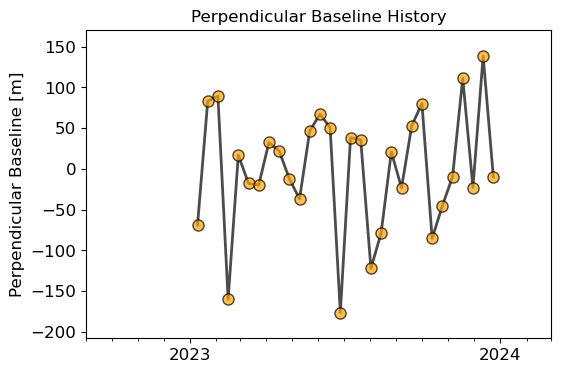

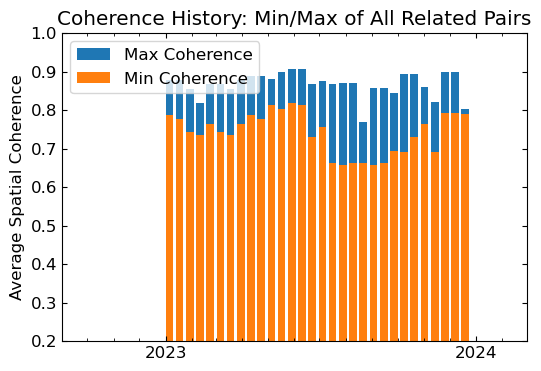

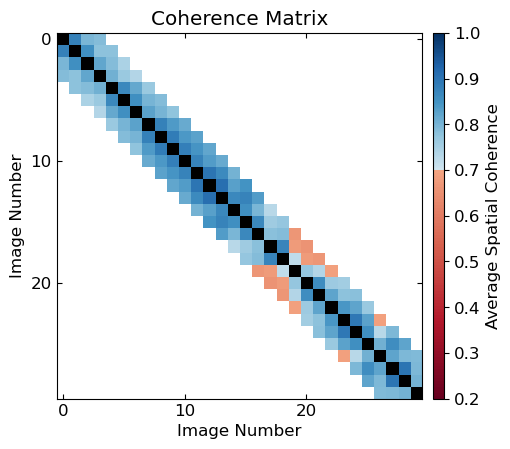

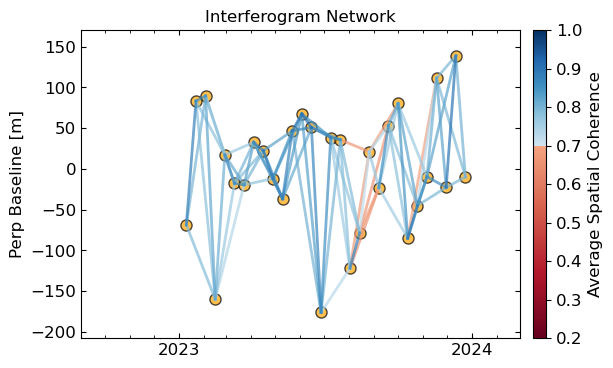

In [8]:
%matplotlib inline
with osl.work_dir(mint_path):
    scp_args = f'{inputs_path}/ifgramStack.h5 --cmap-vlist 0.2 0.7 1.0'
    plot_network.main(scp_args.split())
    plots = ['pbaseHistory.pdf', 'coherenceHistory.pdf', 'coherenceMatrix.pdf', 'network.pdf']
    for p in plots:
        if (mint_path/p).exists():
            (mint_path/p).rename(f'{plot_path}/{p}')

---
## 5. Delete Input Data

Once MintPy has loaded the data into HDF5 datasets, you may wish to delete the input data to conserve storage space. 

You can adjust configuration parameters and update your analysis without reloading the data from their original source.

In [9]:
s1_paths = list(data_path.glob('S1*'))
pprint(f'S1 directories: {s1_paths}')

('S1 directories: '
 "[PosixPath('/home/jovyan/yuma_utm/S1AA_20230416T133642_20230428T133642_VVP012_INT80_G_ueF_BE93'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20230615T133645_20230627T133645_VVP012_INT80_G_ueF_8A88'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20230416T133642_20230510T133643_VVP024_INT80_G_ueF_3814'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20231130T133649_20231224T133648_VVP024_INT80_G_ueF_541B'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20230323T133641_20230404T133641_VVP012_INT80_G_ueF_39B6'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20231118T133650_20231130T133649_VVP012_INT80_G_ueF_0681'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20230627T133645_20230721T133647_VVP024_INT80_G_ueF_C917'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20230110T133642_20230215T133641_VVP036_INT80_G_ueF_F915'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20231013T133650_20231106T133650_VVP024_INT80_G_ueF_AA32'), "
 "PosixPath('/home/jovyan/yuma_utm/S1AA_20230510T133643_20230615T13364

In [10]:
cleanup_select = osl.select_parameter(
    [
        'Delete S1 directories',
        'Save S1 directories'
    ]
)
print("Save or delete input data:")
display(cleanup_select)

Save or delete input data:


RadioButtons(layout=Layout(min_width='800px'), options=('Delete S1 directories', 'Save S1 directories'), value…

In [ ]:
if 'Delete' in cleanup_select.value:
    for d in s1_paths:
        shutil.rmtree(d)